# Dimension Reduction 개요
차원 축소: 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성
- 차원이 너무 많으면 예측 신뢰도 저하
- 변수 간 상관관계가 높으면 다중 공선성 문제로 예측 성능 저하

## 피처 선택과 피처 추출
피처 선택: 종속성이 강한 불필요한 피처 제거, 주요 피처만 선택
피처 추출: 함축적으로 피처를 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출 (Latent Factor의 추출)
-> 차원 축소를 통해 데이터를 더 잘 설명할 수 있는 잠재적인 요소 추출
대표 알고리즘: PCA, SVD, NMF

이미지 데이터 내 잠재된 특성을 피처로 도출 -> 이미지는 차원 축소가 예측 성능에 훨씬 도움
텍스트 문서의 의미 추출 -> 단어 구성 내 숨겨진 Semantic 의미나 Topic 도출

## PCA (Principal Component Analysis)
변수 간 상관관계를 이용해 주성분을 추출하여 차원 축소

피처 중 가장 큰 데이터 변동성을 갖는 것을 첫 번째 vector, 첫 번째 vector의 직교 vector를 두 번째 vector, 두 번째 vector의 직교 vector를 세 번째 vector로 설정
-> 매우 작은 주성분으로 총 변동성을 설명

공분산 행렬을 고유값 분해 -> 고유 벡트에 입력 데이터 선형 변환
- 공분산 행렬? 각 변수들에 관련된 공분산을 포함하는 정방형 행렬
    - 정방 행렬: 열과 행이 같은 행렬
    - 대칭 행렬: 애각 원소를 중심으로 원소 값이 대칭되는 행렬 (A^T = A)
- 고유 벡터? 행렬 A를 곱하더라도 방향이 변하지 않고 크기만 변하는 벡터
- 선형 변환? 특정 vector에 행렬 A를 곱해 새로운 벡터로 변환

수행
1. 입력 데이터 세트, 공분산 행렬 생성
2. 공분산 행렬 고유벡터, 고유값 계산
3. 고유값이 큰 순으로 PCA 변환 차수만큼 고유 벡터 추출
4. 새로운 입력 데이터 변환

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF["target"] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


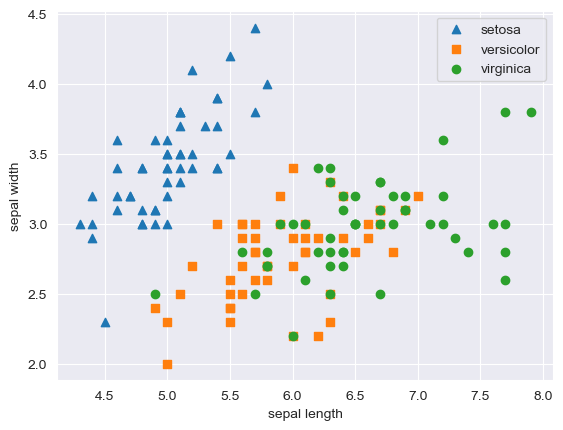

In [2]:
# setosa: triangle, versicolor: rectangle, virginica: circle
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF["target"] == i]["sepal_length"]
    y_axis_data = irisDF[irisDF["target"] == i]["sepal_width"]
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

PCA 를 수행하기 전에는 개별 속성을 함께 스케일링하는 것이 필요

In [3]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [4]:
# convert to PCA using Scikit Learn PCA class
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [7]:
pca_columns = ["pca_component_1", "pca_component_2"]
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca["target"] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


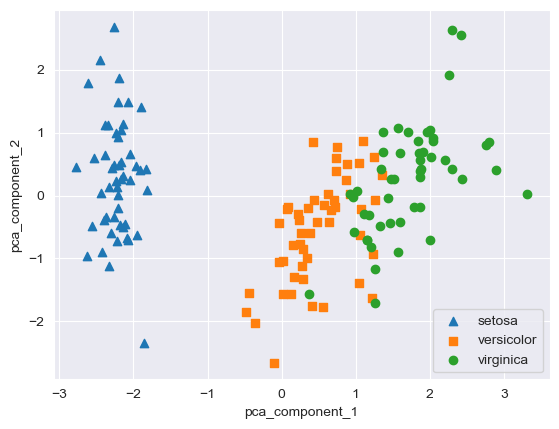

In [8]:
# setosa: triangle, versicolor: rectangle, virginica: circle
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca["target"] == i]["pca_component_1"]
    y_axis_data = irisDF_pca[irisDF_pca["target"] == i]["pca_component_2"]
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel("pca_component_1")
plt.ylabel("pca_component_2")
plt.show()

In [9]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


두 차원만 이용해도 72.9 + 22.8 == 95.7% 변동성을 설명 가능

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring="accuracy", cv=3)
print("individual accuracy:", scores)
print("accuracy", np.mean(scores))

individual accuracy: [0.98 0.94 0.96]
accuracy 0.96


In [12]:
pca_X = irisDF_pca[["pca_component_1", "pca_component_2"]]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring="accuracy", cv=3)
print("individual accuracy:", scores_pca)
print("accuracy", np.mean(scores_pca))

individual accuracy: [0.88 0.88 0.88]
accuracy 0.88


### PCA credit card clients

In [14]:
import pandas as pd

df = pd.read_excel("../pca_credit_card.xls", header=1, sheet_name="Data").iloc[0:, 1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [15]:
df.rename(columns={"PAY_0": "PAY_1", "default payment next month": "default"}, inplace=True)
y_target = df["default"]
X_features = df.drop("default", axis=1)

<AxesSubplot:>

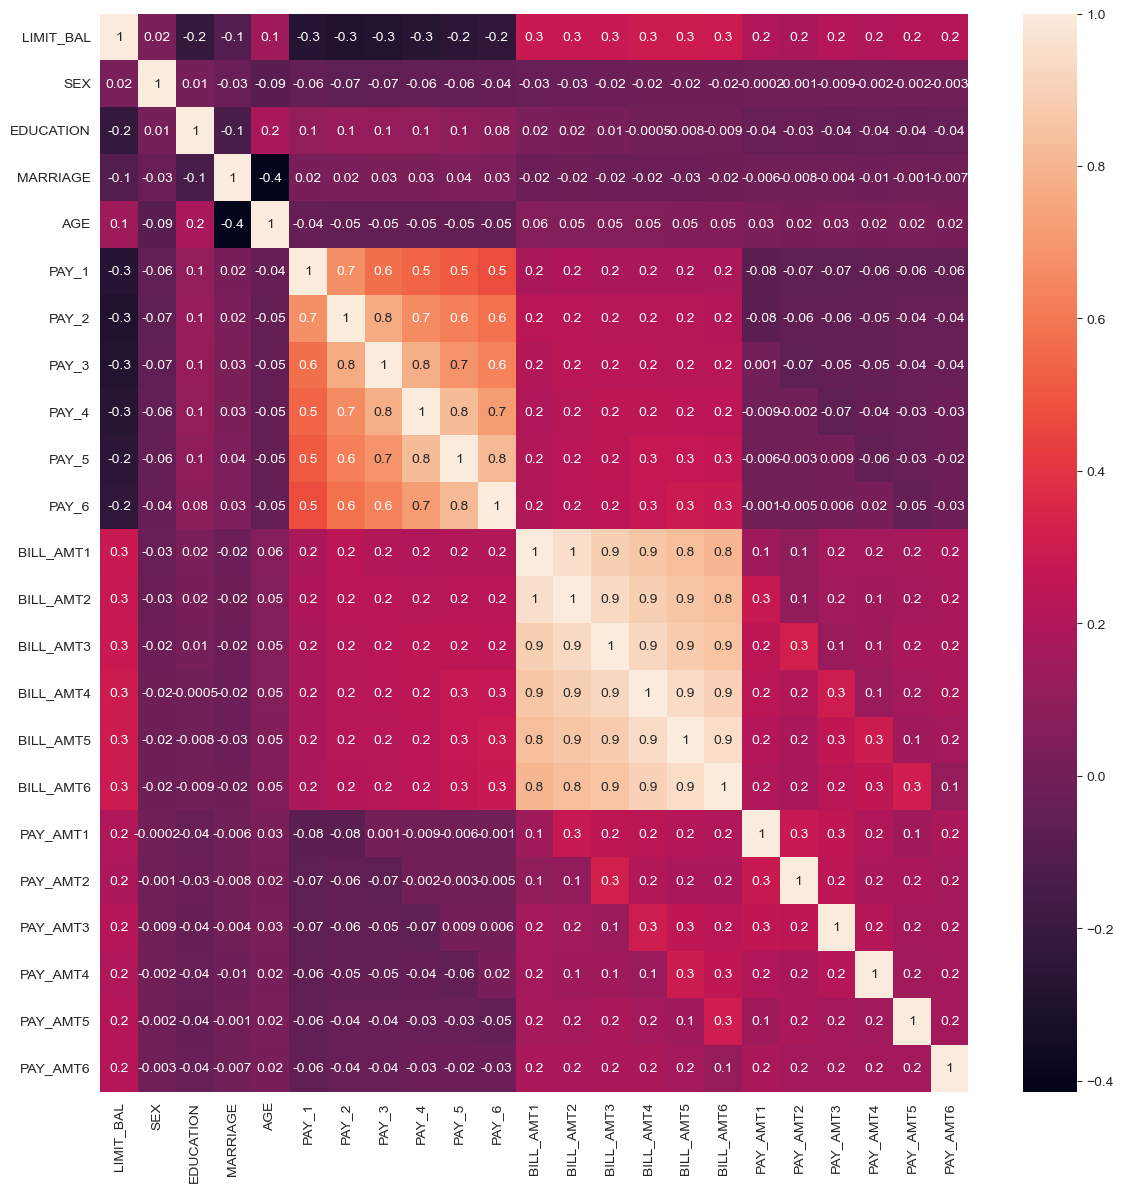

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt=".1g")

상관도가 매우 높은 BILL_AMT 속성 PCA 변환

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_bill = ["BILL_AMT" + str(i) for i in range(1, 7)]
print("cols_bill:", cols_bill)

scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print("PCA Component variance ratio:", pca.explained_variance_ratio_)

cols_bill: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component variance ratio: [0.90555253 0.0509867 ]


In [18]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring="accuracy", cv=3)

print("accuracy", scores)
print("mean accuracy: {0:.4f}".format(np.mean(scores)))

accuracy [0.8083 0.8196 0.8232]
mean accuracy: 0.8170


In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring="accuracy", cv=3)

print("accuracy", scores_pca)
print("mean accuracy: {0:.4f}".format(np.mean(scores_pca)))

accuracy [0.7924 0.7987 0.8016]
mean accuracy: 0.7976


Computer Vision 분야에서는 Eigen-face 라고 불리는 PCA 변환 사용